In [2]:
import pandas as pd
data = pd.read_csv("HR_comma_sep.csv", encoding="ISO8859-1")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['sales'] = encoder.fit_transform(data['sales'])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,low
1,0.80,0.86,5,262,6,0,1,0,7,medium
2,0.11,0.88,7,272,4,0,1,0,7,medium
3,0.72,0.87,5,223,5,0,1,0,7,low
4,0.37,0.52,2,159,3,0,1,0,7,low


In [8]:
from sklearn.preprocessing import StandardScaler
features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales']
# extracting out the features
x = data.loc[:, features].values
# Standardizing the features
x_standardized = StandardScaler().fit_transform(x)
x_standardized

array([[-0.93649469, -1.08727529, -1.46286291, ...,  1.788917  ,
        -0.14741182,  0.39372503],
       [ 0.75281433,  0.84070693,  0.97111292, ...,  1.788917  ,
        -0.14741182,  0.39372503],
       [-2.02247906,  0.95755433,  2.59376348, ...,  1.788917  ,
        -0.14741182,  0.39372503],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ...,  1.788917  ,
        -0.14741182,  0.74231612],
       [-2.02247906,  1.42494396,  1.7824382 , ...,  1.788917  ,
        -0.14741182,  0.74231612],
       [-0.97671633, -1.14569899, -1.46286291, ...,  1.788917  ,
        -0.14741182,  0.74231612]])

In [9]:
import numpy as np
cov_data = np.corrcoef(x.T)
cov_data

array([[ 1.        ,  0.10502121, -0.14296959, -0.02004811, -0.10086607,
         0.05869724, -0.38837498,  0.02560519,  0.0031533 ],
       [ 0.10502121,  1.        ,  0.34933259,  0.3397418 ,  0.13159072,
        -0.00710429,  0.00656712, -0.00868377,  0.00777212],
       [-0.14296959,  0.34933259,  1.        ,  0.41721063,  0.19678589,
        -0.00474055,  0.02378719, -0.00606396,  0.00926828],
       [-0.02004811,  0.3397418 ,  0.41721063,  1.        ,  0.12775491,
        -0.01014289,  0.07128718, -0.00354441,  0.00391313],
       [-0.10086607,  0.13159072,  0.19678589,  0.12775491,  1.        ,
         0.00212042,  0.14482217,  0.06743293, -0.01800956],
       [ 0.05869724, -0.00710429, -0.00474055, -0.01014289,  0.00212042,
         1.        , -0.15462163,  0.03924543,  0.00342508],
       [-0.38837498,  0.00656712,  0.02378719,  0.07128718,  0.14482217,
        -0.15462163,  1.        , -0.06178811,  0.03210529],
       [ 0.02560519, -0.00868377, -0.00606396, -0.00354441,  0

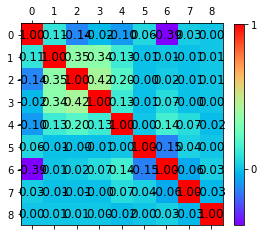

In [10]:
import matplotlib.pyplot as plt
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components=pca.fit_transform(x_standardized)
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDF, data[['salary']]], axis = 1)
finalDf

,principal component 1,principal component 2,salary
0,-1.297678,-2.453285,low
1,2.421709,-0.388101,medium
2,3.554289,-1.644091,medium
3,1.870942,-0.625829,low
4,-1.296087,-2.488788,low
...,...,...,...
14994,-1.263202,-2.363284,low
14995,-1.389361,-2.568438,low
14996,-1.432827,-2.538115,low
14997,3.407774,-1.579578,low


In [13]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

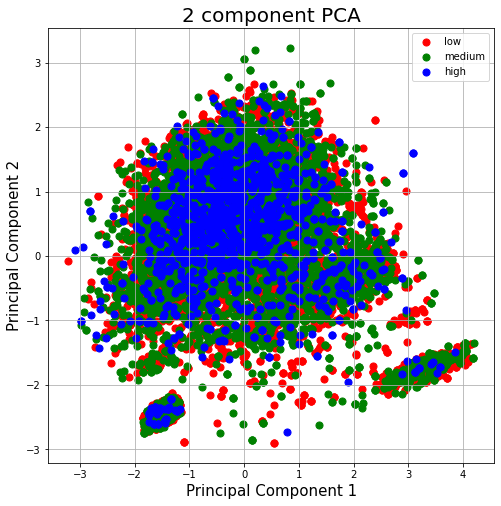

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['low', 'medium', 'high']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['salary'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()